<a href="https://colab.research.google.com/github/RidmieWee/DS_Project/blob/main/3.%20Implementation/drowsiness_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [2]:
# Mount into the drive
drive.mount('/content/drive')

Mounted at /content/drive


# Exploratary Data Analysis

In [3]:
# Load one image
img = cv2.imread('../content/drive/MyDrive/Research/data/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

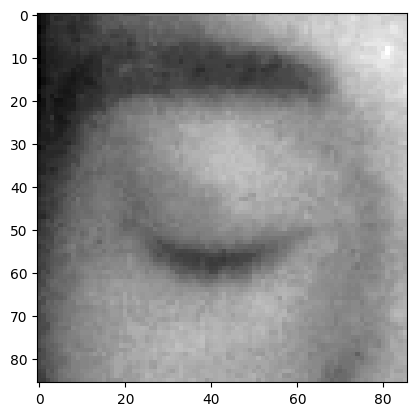

In [4]:
# Display that image
plt.imshow(img, cmap="gray")

In [5]:
# Define data folder and classes
images = '../content/drive/MyDrive/Research/data'
categories = ['Closed_Eyes', 'Opened_Eyes']

In [6]:
# Define a array for stre images
data = []

# Define a function to extract data from folder
def extract_data():
    # Iterate over each folder in directory
    for category in categories:
        # Defie the path to directory
        path = os.path.join(images, category)
        # Extract the index
        class_num = categories.index(category)
        # Iterate over each imane
        for img in os.listdir(path):
            try:
                # Read image
                img_array = cv2.imread(os.path.join(path, img))
                # Add image and labelinto new array
                data.append([img_array, category])
            # Check for any errors to ignore
            except Exception as e:
                pass

In [7]:
# Call function to extract data
extract_data()

In [8]:
# Ensure the data length
print(len(data))

10000


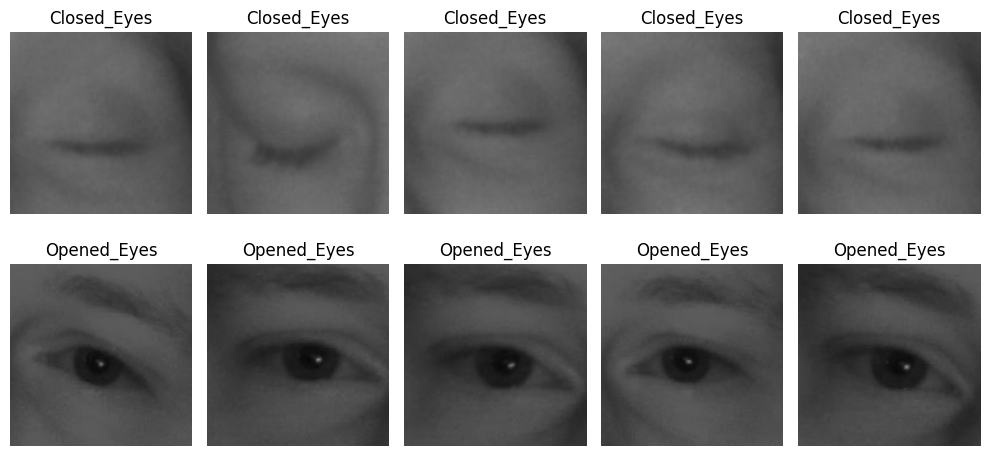

In [9]:
# Explore extract images

# Define the number of rows and columns
rows = 2
columns = 5

# Define size for the figure
plt.figure(figsize=(10, 5))

# Iterate over each class
for class_name in categories:
    # Filter images of each class
    class_images = [img_data for img_data in data if img_data[1] == class_name]
    # Plot images of each class
    for i in range(min(len(class_images), 5)):
        plt.subplot(rows, columns, categories.index(class_name) * 5 + i + 1)
        plt.imshow(class_images[i][0])
        plt.title(class_name)
        plt.axis('off')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Calculate image statistics

# Define a function to extract image statistics
def calculate_image_statistics(data):
    # Define dictionary to store statistics for each category
    statistics = {'Closed_Eyes': [], 'Opened_Eyes': []}
    # Iterate over each image-category pair
    for image, category in data:
        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Add mean pixel intensity
        statistics[category].append(np.mean(grayscale_image))
    # Return new dictionary
    return statistics

# Call function to calculate image statistics
image_statistics = calculate_image_statistics(data)

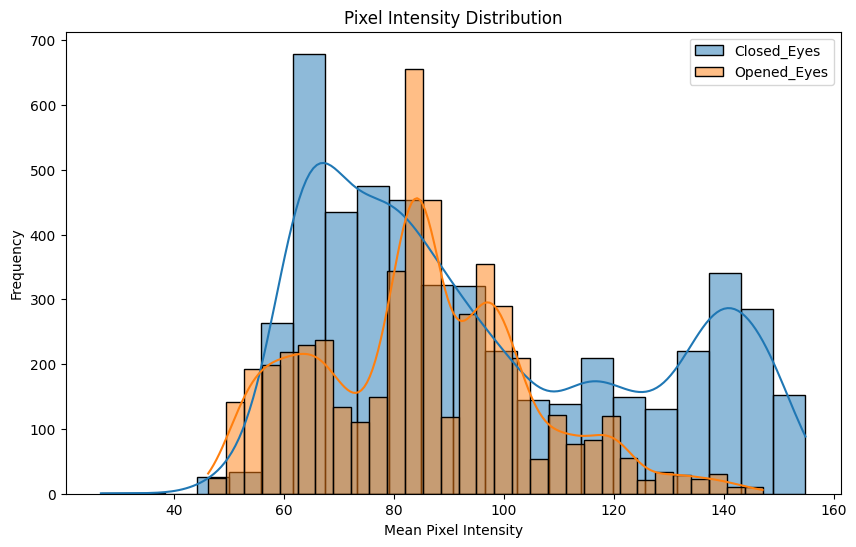

In [11]:
# Plot histograms of pixel intensity distributions
# Define a figure
plt.figure(figsize=(10, 6))

# Iterte over each category
for category in categories:
    # Plot data points as a histogram
    sns.histplot(image_statistics[category], kde=True, label=category, alpha=0.5)

# Define labels for axies and title
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution')
# Add legend
plt.legend()

# Plot the graph
plt.show()

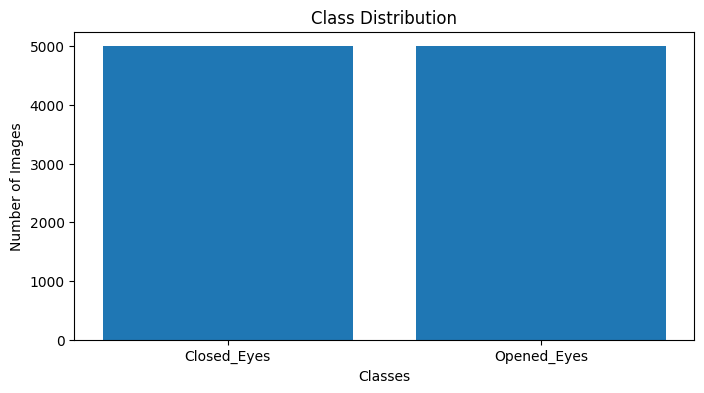

In [12]:
# Identify class imbalance

# Define a figure
plt.figure(figsize=(8, 4))

# Calculate the total images
image_count = {category: len([img for img,
                              cat in data if cat == category])
                              for category in categories}

# Plot the count of each category
plt.bar(image_count.keys(), image_count.values())

# Define axis labels and titles
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')

# Show the plot
plt.show()

In [13]:
# Check the shape of each image

# Iterate over each image
for image, category in data:

    # Check the shape
    image_shape = image.shape

    # Print the shape
    print(f"Image shape: {image_shape}, Category: {category}")

Streaming output truncated to the last 5000 lines.
Image shape: (134, 134, 3), Category: Opened_Eyes
Image shape: (117, 117, 3), Category: Opened_Eyes
Image shape: (116, 116, 3), Category: Opened_Eyes
Image shape: (134, 134, 3), Category: Opened_Eyes
Image shape: (116, 116, 3), Category: Opened_Eyes
Image shape: (137, 137, 3), Category: Opened_Eyes
Image shape: (120, 120, 3), Category: Opened_Eyes
Image shape: (123, 123, 3), Category: Opened_Eyes
Image shape: (137, 137, 3), Category: Opened_Eyes
Image shape: (75, 75, 3), Category: Opened_Eyes
Image shape: (136, 136, 3), Category: Opened_Eyes
Image shape: (132, 132, 3), Category: Opened_Eyes
Image shape: (136, 136, 3), Category: Opened_Eyes
Image shape: (112, 112, 3), Category: Opened_Eyes
Image shape: (139, 139, 3), Category: Opened_Eyes
Image shape: (137, 137, 3), Category: Opened_Eyes
Image shape: (131, 131, 3), Category: Opened_Eyes
Image shape: (118, 118, 3), Category: Opened_Eyes
Image shape: (139, 139, 3), Category: Opened_Eyes
I

In [14]:
# Define the newsize
new_size = (64, 64)

# Iterate over each image
for i in range(len(data)):

    # Extract image and category
    image, category = data[i]

    # Resize the image
    resized_image = cv2.resize(image, new_size)

    # Add the image with new size
    data[i] = (resized_image, category)

In [15]:
# Extract one image
image1 = data[0][0]

# Check shape of the image
image_shape = image1.shape

# Print the shape
print(image_shape)

(64, 64, 3)


In [16]:
# Iterate over each image
for i in range(len(data)):
    # Extract the images and label
    img_array, category = data[i]

    # Convert it into grayscale
    grayscale_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)

    # Update the data list with the grayscale image
    data[i] = [grayscale_img, category]


In [17]:
# Extract one image
image1 = data[0][0]

# Check shape of the image
image_shape = image1.shape

# Print the shape
print(image_shape)

(64, 64)


# Data Preprocessing

In [18]:
# Construct random data

# Shuffling the data
random.shuffle(data)

In [19]:
# Define lists data images and labels
X = []
y = []

# Iterate over each image
for features, label in data:

    # Add images into the list
    X.append(features)
    # Add labels into the list
    y.append(label)

# Convert into a numpy array
X = np.array(X)
Y = np.array(y)

In [20]:
# Explore the shape of image list
X.shape

(10000, 64, 64)

In [21]:
# Expanding 2D dimension into 3D
X = np.expand_dims(X,-1)

In [22]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [23]:
# Explore shape
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(6700, 64, 64, 1) (6700,) (3300, 64, 64, 1) (3300,)


In [24]:
# Normalizing the images using min-max scaling

# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Reduce pixel values
x_train /= 255
x_test /= 255

In [25]:
# Convert string labels to numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [27]:
# Define data augmentation
train_generator = ImageDataGenerator(
    # Randomly rotate image
    rotation_range=20,
    # Defime zoom range
    zoom_range=0.15,
    # Randomly shift images horizontally
    width_shift_range=0.2,
    # Randomly shift images vertically
    height_shift_range=0.2,
    # Define random shear
    shear_range=0.15,
    # Define flip image
    horizontal_flip=True,
    # Define mode for filling points
    fill_mode="nearest")

# Model definition, training and evaluation

## Base model

In [109]:
# Initialize the model
base_model = Sequential()

# Define convolutional layers
base_model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 1)))
base_model.add(MaxPooling2D(pool_size=2))

base_model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
base_model.add(MaxPooling2D(pool_size=2))

# Flatten the output of the convolutional layers
base_model.add(Flatten())

# Define dense layers
base_model.add(Dense(units=128, activation='relu'))
base_model.add(Dense(units=64, activation='relu'))

# Define output layer
base_model.add(Dense(units=1, activation='sigmoid'))

In [110]:
# Print model summary
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               1

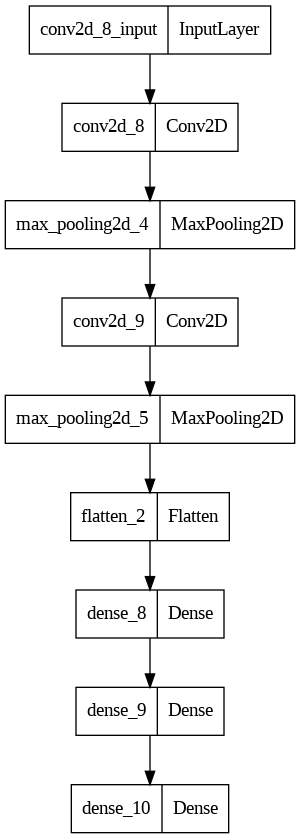

In [112]:
# Plot model
plot_model(base_model)

In [111]:
# Compile the model
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
# Define the path to save the model
path = '../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2'

# Ensure the directory exists
os.makedirs(path, exist_ok=True)

# Define the path to save the model
model_checkpoint_path = os.path.join(path, 'besemodel_v2.h5')

In [115]:
callback_base = tf.keras.callbacks.ModelCheckpoint(
    # Define path to save best model
    filepath=model_checkpoint_path,
    # Save full model
    save_weights_only=False,
    # Monitor validation loss for select best model
    monitor='val_loss',
    # Define the minimum mode
    mode='min',
    # Save the best model
    save_best_only=True,
    verbose =1)

In [116]:
# Train the model
history_base = base_model.fit(x_train, y_train_encoded, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback_base)

Epoch 1/30
168/168 [==============================] - ETA: 0s - loss: 0.2276 - accuracy: 0.9030
Epoch 1: val_loss improved from inf to 0.05968, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/besemodel_v2.h5
168/168 [==============================] - 10s 51ms/step - loss: 0.2276 - accuracy: 0.9030 - val_loss: 0.0597 - val_accuracy: 0.9813
Epoch 2/30
  1/168 [..............................] - ETA: 8s - loss: 0.0184 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


167/168 [============================>.] - ETA: 0s - loss: 0.0479 - accuracy: 0.9837
Epoch 2: val_loss improved from 0.05968 to 0.03032, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/besemodel_v2.h5
168/168 [==============================] - 9s 52ms/step - loss: 0.0478 - accuracy: 0.9838 - val_loss: 0.0303 - val_accuracy: 0.9888
Epoch 3/30
167/168 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9923
Epoch 3: val_loss improved from 0.03032 to 0.02591, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/besemodel_v2.h5
168/168 [==============================] - 9s 56ms/step - loss: 0.0279 - accuracy: 0.9924 - val_loss: 0.0259 - val_accuracy: 0.9918
Epoch 4/30
168/168 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9896
Epoch 4: val_loss did not improve from 0.02591
168/168 [==============================] - 8s 48ms/step - loss: 0.0301 - accuracy: 0.9896 - val_loss

In [117]:
# Model evaluation

# Extract test loss and accuracy
test_loss_accuracy_base = base_model.evaluate(x_test, y_test_encoded, verbose=1)

# Print accuracy
print('Test loss:', test_loss_accuracy_base[0])
print('Test accuracy:', test_loss_accuracy_base[1])

104/104 [==============================] - 2s 14ms/step - loss: 0.0155 - accuracy: 0.9979
Test loss: 0.01549194660037756
Test accuracy: 0.9978787899017334


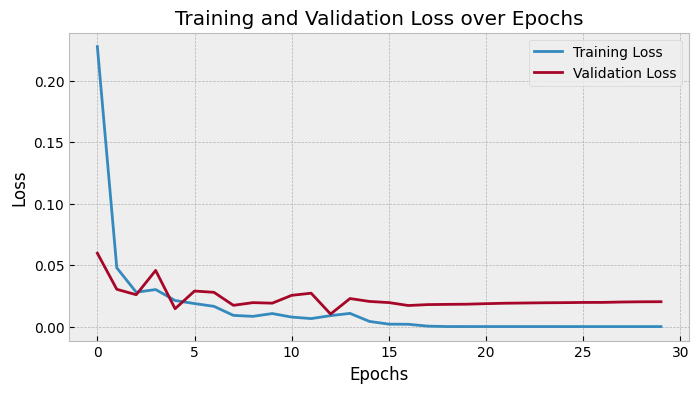

In [118]:
# Plot training and validation loss over epochs
plt.figure(figsize=(8, 4))

# Plot the loss
plt.plot(history_base.history['loss'], label='Training Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
# Plot labels for axis and titles
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Add legend
plt.legend()
plt.grid(True)

# Plot the graph
plt.show()

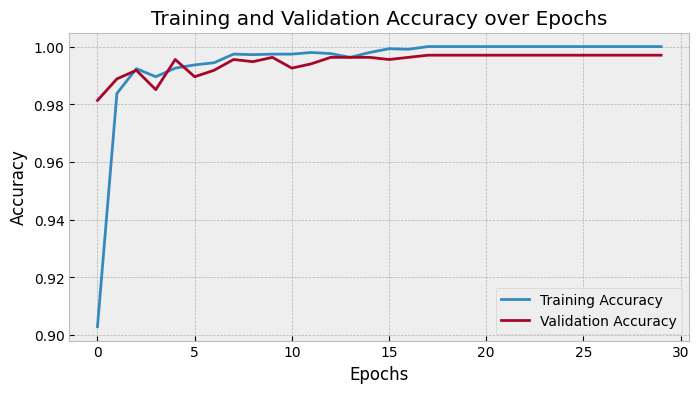

In [119]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 4))

# Plot the accuracy
plt.plot(history_base.history['accuracy'], label='Training Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
# Plot labels for axis and titles
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Add legend
plt.legend()
plt.grid(True)
# Plot the graph
plt.show()


In [120]:
# Save the entire model
base_model.save('../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/base_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [121]:
# Load best model performance
best_base_model = load_model('../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/besemodel_v2.h5')

# Evaluate model performance
best_base_model.evaluate(x_test, y_test_encoded)

104/104 [==============================] - 2s 13ms/step - loss: 0.0150 - accuracy: 0.9961


[0.014967253431677818, 0.9960606098175049]

1/1 [==============================] - 0s 26ms/step


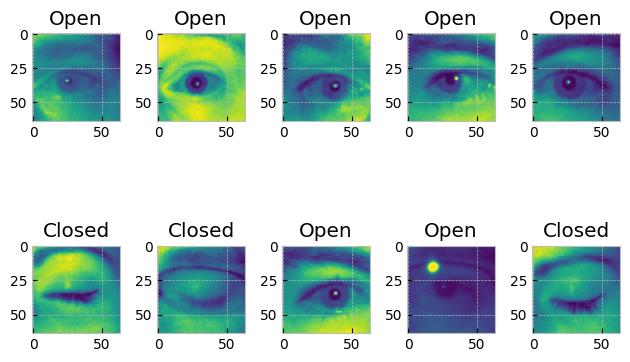

In [122]:
# Show the predictions

# Iterate over the 10 samples in x_test
for idx, i in enumerate(x_test[:10]):

    # Make prediction
    result = best_base_model.predict(np.expand_dims(i,0))

    # Define subplot
    plt.subplot(2, 5, idx+1)

    # Plot the image
    plt.imshow(i)

    # Plot the predicted label
    if result > 0.5:
        plt.title('Open')
    else:
        plt.title('Closed')

    # Define axis
    plt.axis('on')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

104/104 [==============================] - 2s 16ms/step


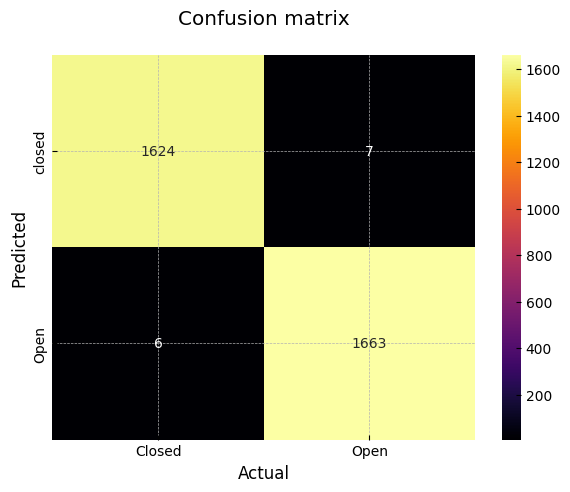

In [123]:
# Make predictions
preds2 = best_base_model.predict(x_test)
preds2 = (preds2 >= 0.5).astype(np.int32)

# Define confusion matrix
cm = confusion_matrix(y_test_encoded, preds2)

# Construct confution matrix
plt.figure(figsize=(15, 5))

# Define df for confusion matrix
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])

# Create a subplot
plt.subplot(121)

# Plot the heatmap
sns.heatmap(df_cm, annot=True, fmt="d", cmap='inferno')

# Define axis
plt.axis('on')

# Add titles and labels
plt.title("Confusion matrix\n")
plt.ylabel("Predicted")
plt.xlabel("Actual")

# Show the plt
plt.show()

## Base model with batch normalization and maxpooling layers

In [65]:
# Define input layer
input_layer = Input(shape=(64, 64, 1))

# Define convolutional layers
conv1 = Conv2D(filters=32, kernel_size=5, strides=1, activation='relu')(input_layer)
conv2 = Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', use_bias=False)(conv1)
batch_norm1 = BatchNormalization()(conv2)
max_pool1 = MaxPooling2D(strides=2)(batch_norm1)
dropout1 = Dropout(0.3)(max_pool1)

conv3 = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu')(dropout1)
conv4 = Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', use_bias=False)(conv3)
batch_norm2 = BatchNormalization()(conv4)
max_pool2 = MaxPooling2D(strides=2)(batch_norm2)
dropout2 = Dropout(0.3)(max_pool2)

# Define flatten layer
flatten = Flatten()(dropout2)

# Define dense layers
dense1 = Dense(units=256, activation='relu', use_bias=False)(flatten)
batch_norm3 = BatchNormalization()(dense1)

dense2 = Dense(units=128, use_bias=False, activation='relu')(batch_norm3)

dense3 = Dense(units=84, use_bias=False, activation='relu')(dense2)
batch_norm4 = BatchNormalization()(dense3)
dropout3 = Dropout(0.3)(batch_norm4)

# Define output layer
output_layer = Dense(units=1, activation='sigmoid')(dropout3)

# Construct the model
model2 = Model(inputs=input_layer, outputs=output_layer)

In [38]:
# Explore model summary
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 32)        25600     
                                                                 
 batch_normalization_4 (Bat  (None, 56, 56, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0   

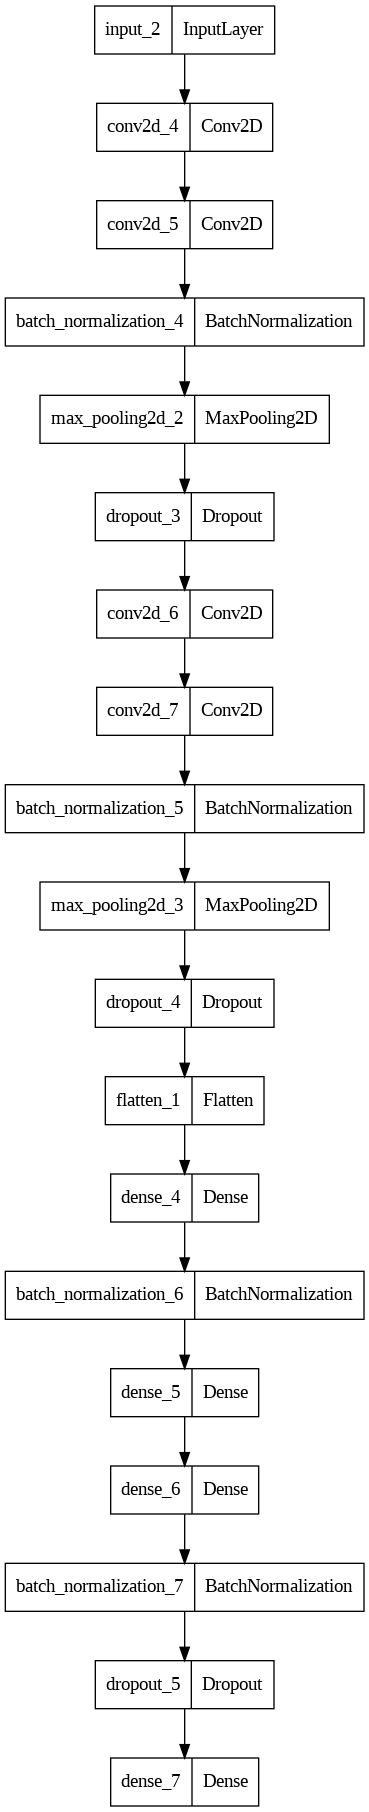

In [39]:
# Plot model
plot_model(model2)

In [66]:
# Compiling the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
# Define the path to save the model
path = '../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2'

# Ensure the directory exists
os.makedirs(path, exist_ok=True)

# Define the path to save the model
model_checkpoint_path2 = os.path.join(path, 'bestModel_v2.h5')

In [43]:
callback = tf.keras.callbacks.ModelCheckpoint(
    # Define path to save best model
    filepath=model_checkpoint_path2,
    # Save full model
    save_weights_only=False,
    # Monitor validation loss for select best model
    monitor='val_loss',
    # Define the minimum mode
    mode='min',
    # Save the best model
    save_best_only=True,
    verbose =1)

In [44]:
# Train the model
history2 = model2.fit(x_train, y_train_encoded, validation_split=0.2, epochs=30, batch_size=32, callbacks=callback)

Epoch 1/30
168/168 [==============================] - ETA: 0s - loss: 0.1222 - accuracy: 0.9563
Epoch 1: val_loss improved from inf to 0.51001, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel_v2.h5
168/168 [==============================] - 46s 260ms/step - loss: 0.1222 - accuracy: 0.9563 - val_loss: 0.5100 - val_accuracy: 0.7276
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


168/168 [==============================] - ETA: 0s - loss: 0.0449 - accuracy: 0.9845
Epoch 2: val_loss improved from 0.51001 to 0.22872, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel_v2.h5
168/168 [==============================] - 42s 251ms/step - loss: 0.0449 - accuracy: 0.9845 - val_loss: 0.2287 - val_accuracy: 0.8769
Epoch 3/30
168/168 [==============================] - ETA: 0s - loss: 0.0265 - accuracy: 0.9920
Epoch 3: val_loss improved from 0.22872 to 0.13174, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel_v2.h5
168/168 [==============================] - 41s 244ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.1317 - val_accuracy: 0.9590
Epoch 4/30
168/168 [==============================] - ETA: 0s - loss: 0.0448 - accuracy: 0.9860
Epoch 4: val_loss improved from 0.13174 to 0.11105, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bes

In [45]:
# Model evaluation

# Extract test loss and accuracy
test_loss_accuracy_2 = model2.evaluate(x_test, y_test_encoded, verbose=1)

# Print accuracy
print('Test loss:', test_loss_accuracy_2[0])
print('Test accuracy:', test_loss_accuracy_2[1])

104/104 [==============================] - 6s 53ms/step - loss: 0.0116 - accuracy: 0.9973
Test loss: 0.011628652922809124
Test accuracy: 0.9972727298736572


In [58]:
# Set plot style
plt.style.use('bmh')

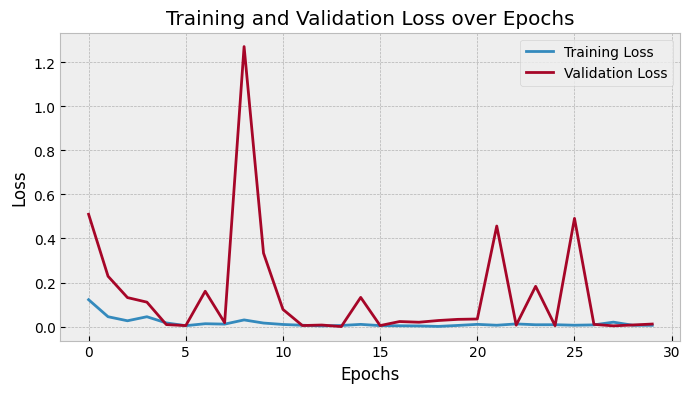

In [51]:
# Plot training and validation loss over epochs
plt.figure(figsize=(8, 4))

# Plot the loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
# Plot labels for axis and titles
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Add legend
plt.legend()
plt.grid(True)

# Plot the graph
plt.show()

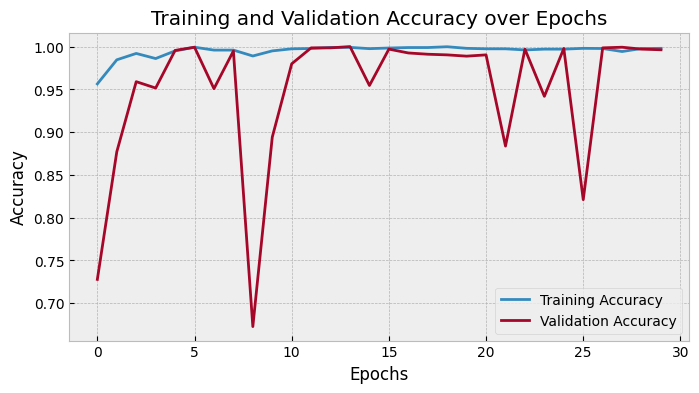

In [52]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 4))

# Plot the accuracy
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
# Plot labels for axis and titles
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Add legend
plt.legend()
plt.grid(True)
# Plot the graph
plt.show()


In [53]:
# Save the entire model
model2.save('../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
# Load best model performance
best_model2 = load_model('../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel_v2.h5')

# Evaluate model performance
best_model2.evaluate(x_test, y_test_encoded)

104/104 [==============================] - 5s 51ms/step - loss: 0.0092 - accuracy: 0.9982


[0.00915655866265297, 0.9981818199157715]

1/1 [==============================] - 0s 27ms/step


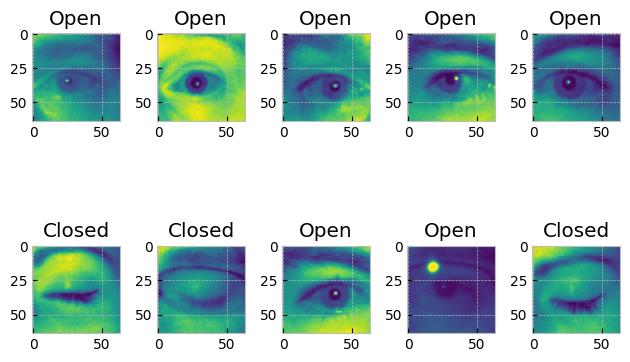

In [103]:
# Show the predictions

# Iterate over the 10 samples in x_test
for idx, i in enumerate(x_test[:10]):

    # Make prediction
    result = best_model2.predict(np.expand_dims(i,0))

    # Define subplot
    plt.subplot(2, 5, idx+1)

    # Plot the image
    plt.imshow(i)

    # Plot the predicted label
    if result > 0.5:
        plt.title('Open')
    else:
        plt.title('Closed')

    # Define axis
    plt.axis('on')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

104/104 [==============================] - 6s 59ms/step


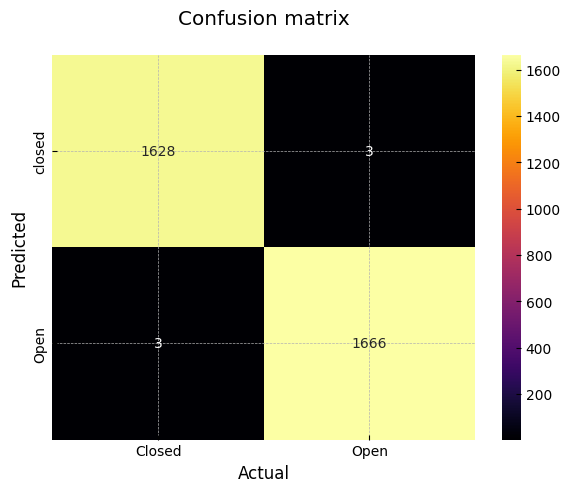

In [108]:
# Make predictions
preds2 = best_model2.predict(x_test)
preds2 = (preds2 >= 0.5).astype(np.int32)

# Define confusion matrix
cm = confusion_matrix(y_test_encoded, preds2)

# Construct confution matrix
plt.figure(figsize=(15, 5))

# Define df for confusion matrix
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])

# Create a subplot
plt.subplot(121)

# Plot the heatmap
sns.heatmap(df_cm, annot=True, fmt="d", cmap='inferno')

# Define axis
plt.axis('on')

# Add titles and labels
plt.title("Confusion matrix\n")
plt.ylabel("Predicted")
plt.xlabel("Actual")

# Show the plt
plt.show()

## Base model with data augmentation

In [50]:
# Initialize the model
base_model = Sequential()

# Define convolutional layers
base_model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 1)))
base_model.add(MaxPooling2D(pool_size=2))

base_model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
base_model.add(MaxPooling2D(pool_size=2))

# Flatten the output of the convolutional layers
base_model.add(Flatten())

# Define dense layers
base_model.add(Dense(units=128, activation='relu'))
base_model.add(Dense(units=64, activation='relu'))

# Define output layer
base_model.add(Dense(units=1, activation='sigmoid'))

In [51]:
# Compile the model
base_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
# Define the path to save the model
path = '../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2'

# Ensure the directory exists
os.makedirs(path, exist_ok=True)

# Define the path to save the model
model_checkpoint_path_aug = os.path.join(path, 'besemodel_v2_aug.h5')

In [53]:
callback_base_aug = tf.keras.callbacks.ModelCheckpoint(
    # Define path to save best model
    filepath=model_checkpoint_path_aug,
    # Save full model
    save_weights_only=False,
    # Monitor validation loss for select best model
    monitor='val_loss',
    # Define the minimum mode
    mode='min',
    # Save the best model
    save_best_only=True,
    verbose =1)

In [54]:
# Split the training data into training and validation sets
x_train_1, x_val, y_train_encoded_1, y_val_encoded = train_test_split(x_train, y_train_encoded, test_size=0.2, random_state=42)


In [55]:
# Train the model
history_base = base_model.fit(
    train_generator.flow(x_train_1, y_train_encoded_1, batch_size=32),
    steps_per_epoch=len(x_train_1) / 32,
    epochs=30,
    validation_data=(x_val, y_val_encoded),
    callbacks=callback_base_aug
)

Epoch 1/30
168/167 [==============================] - ETA: 0s - loss: 0.4453 - accuracy: 0.7674
Epoch 1: val_loss improved from inf to 0.27905, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/besemodel_v2_aug.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


167/167 [==============================] - 11s 60ms/step - loss: 0.4453 - accuracy: 0.7674 - val_loss: 0.2791 - val_accuracy: 0.9216
Epoch 2/30
168/167 [==============================] - ETA: 0s - loss: 0.3330 - accuracy: 0.8558
Epoch 2: val_loss improved from 0.27905 to 0.21576, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/besemodel_v2_aug.h5
167/167 [==============================] - 10s 58ms/step - loss: 0.3330 - accuracy: 0.8558 - val_loss: 0.2158 - val_accuracy: 0.9366
Epoch 3/30
168/167 [==============================] - ETA: 0s - loss: 0.2855 - accuracy: 0.8787
Epoch 3: val_loss improved from 0.21576 to 0.18211, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/besemodel_v2_aug.h5
167/167 [==============================] - 9s 56ms/step - loss: 0.2855 - accuracy: 0.8787 - val_loss: 0.1821 - val_accuracy: 0.9284
Epoch 4/30
168/167 [==============================] - ETA: 0s - loss: 0.2364 - accuracy: 0

In [56]:
# Model evaluation

# Extract test loss and accuracy
test_loss_accuracy_base_aug = base_model.evaluate(x_test, y_test_encoded, verbose=1)

# Print accuracy
print('Test loss:', test_loss_accuracy_base_aug[0])
print('Test accuracy:', test_loss_accuracy_base_aug[1])

104/104 [==============================] - 1s 13ms/step - loss: 0.0521 - accuracy: 0.9791
Test loss: 0.05214276537299156
Test accuracy: 0.9790909290313721


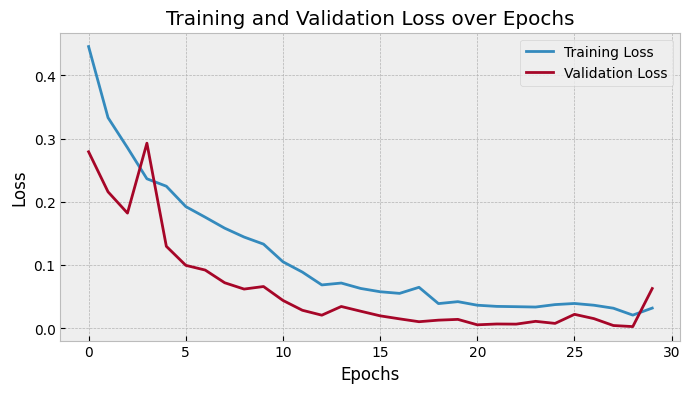

In [59]:
# Plot training and validation loss over epochs
plt.figure(figsize=(8, 4))

# Plot the loss
plt.plot(history_base.history['loss'], label='Training Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
# Plot labels for axis and titles
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Add legend
plt.legend()
plt.grid(True)

# Plot the graph
plt.show()

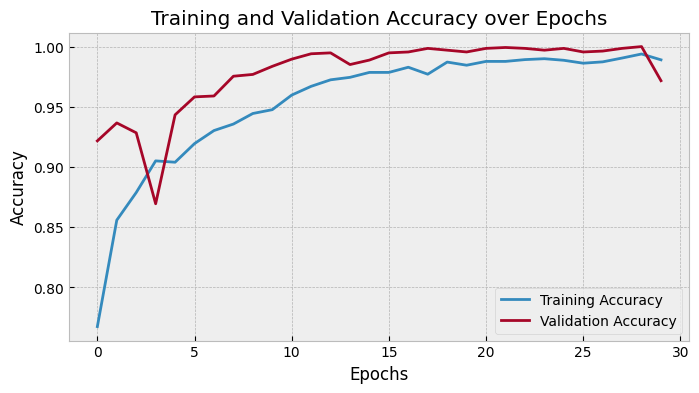

In [60]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 4))

# Plot the accuracy
plt.plot(history_base.history['accuracy'], label='Training Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
# Plot labels for axis and titles
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Add legend
plt.legend()
plt.grid(True)
# Plot the graph
plt.show()


In [61]:
# Save the entire model
base_model.save('../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/base_model_aug.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [62]:
# Load best model performance
best_base_model_aug = load_model('../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/besemodel_v2_aug.h5')

# Evaluate model performance
best_base_model_aug.evaluate(x_test, y_test_encoded)

104/104 [==============================] - 2s 14ms/step - loss: 0.0157 - accuracy: 0.9964


[0.015666281804442406, 0.996363639831543]

1/1 [==============================] - 0s 24ms/step


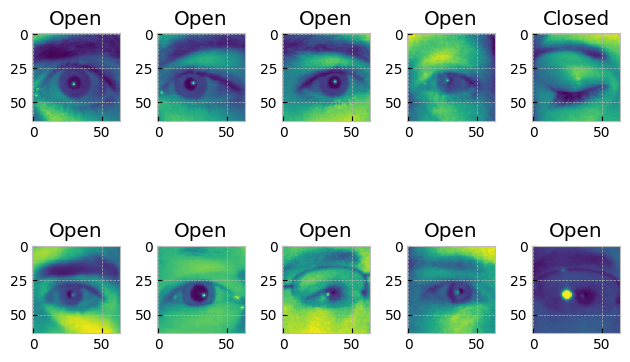

In [63]:
# Show the predictions

# Iterate over the 10 samples in x_test
for idx, i in enumerate(x_test[:10]):

    # Make prediction
    result = best_base_model_aug.predict(np.expand_dims(i,0))

    # Define subplot
    plt.subplot(2, 5, idx+1)

    # Plot the image
    plt.imshow(i)

    # Plot the predicted label
    if result > 0.5:
        plt.title('Open')
    else:
        plt.title('Closed')

    # Define axis
    plt.axis('on')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

104/104 [==============================] - 2s 15ms/step


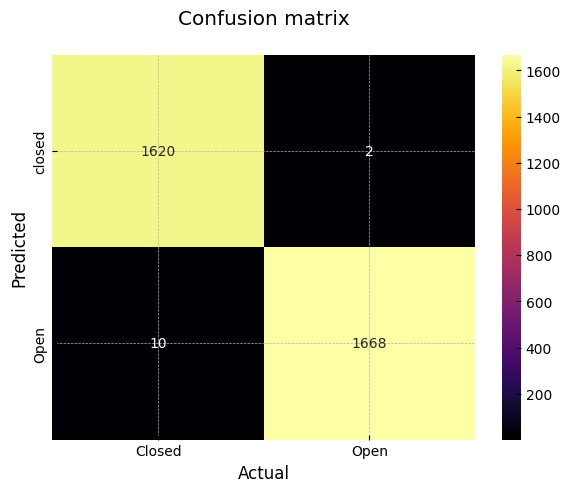

In [64]:
# Make predictions
preds2 = best_base_model_aug.predict(x_test)
preds2 = (preds2 >= 0.5).astype(np.int32)

# Define confusion matrix
cm = confusion_matrix(y_test_encoded, preds2)

# Construct confution matrix
plt.figure(figsize=(15, 5))

# Define df for confusion matrix
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])

# Create a subplot
plt.subplot(121)

# Plot the heatmap
sns.heatmap(df_cm, annot=True, fmt="d", cmap='inferno')

# Define axis
plt.axis('on')

# Add titles and labels
plt.title("Confusion matrix\n")
plt.ylabel("Predicted")
plt.xlabel("Actual")

# Show the plt
plt.show()

## Base model with batch normalization, maxpooling layers and data augmentation

In [67]:
# Define the path to save the model
path = '../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2'

# Ensure the directory exists
os.makedirs(path, exist_ok=True)

# Define the path to save the model
model_checkpoint_path2_aug = os.path.join(path, 'bestModel_v2_aug.h5')

In [68]:
callback_aug = tf.keras.callbacks.ModelCheckpoint(
    # Define path to save best model
    filepath=model_checkpoint_path2_aug,
    # Save full model
    save_weights_only=False,
    # Monitor validation loss for select best model
    monitor='val_loss',
    # Define the minimum mode
    mode='min',
    # Save the best model
    save_best_only=True,
    verbose =1)

In [69]:
# Train the model
history2_aug = model2.fit(
    train_generator.flow(x_train_1, y_train_encoded_1, batch_size=32),
    steps_per_epoch=len(x_train_1) / 32,
    epochs=30,
    validation_data=(x_val, y_val_encoded),
    callbacks=callback_aug
)

Epoch 1/30
168/167 [==============================] - ETA: 0s - loss: 0.3606 - accuracy: 0.8496
Epoch 1: val_loss improved from inf to 1.07746, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel_v2_aug.h5
167/167 [==============================] - 44s 247ms/step - loss: 0.3606 - accuracy: 0.8496 - val_loss: 1.0775 - val_accuracy: 0.5276


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/30
168/167 [==============================] - ETA: 0s - loss: 0.2583 - accuracy: 0.8979
Epoch 2: val_loss improved from 1.07746 to 0.76420, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel_v2_aug.h5
167/167 [==============================] - 45s 270ms/step - loss: 0.2583 - accuracy: 0.8979 - val_loss: 0.7642 - val_accuracy: 0.5537
Epoch 3/30
168/167 [==============================] - ETA: 0s - loss: 0.2236 - accuracy: 0.9162
Epoch 3: val_loss improved from 0.76420 to 0.51906, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel_v2_aug.h5
167/167 [==============================] - 43s 259ms/step - loss: 0.2236 - accuracy: 0.9162 - val_loss: 0.5191 - val_accuracy: 0.7672
Epoch 4/30
168/167 [==============================] - ETA: 0s - loss: 0.1745 - accuracy: 0.9368
Epoch 4: val_loss improved from 0.51906 to 0.40055, saving model to ../content/drive/MyDrive/Research/Saved_models/Drowsines

In [70]:
# Model evaluation

# Extract test loss and accuracy
test_loss_accuracy_2_aug = model2.evaluate(x_test, y_test_encoded, verbose=1)

# Print accuracy
print('Test loss:', test_loss_accuracy_2_aug[0])
print('Test accuracy:', test_loss_accuracy_2_aug[1])

104/104 [==============================] - 6s 53ms/step - loss: 0.2712 - accuracy: 0.8909
Test loss: 0.2711845934391022
Test accuracy: 0.8909090757369995


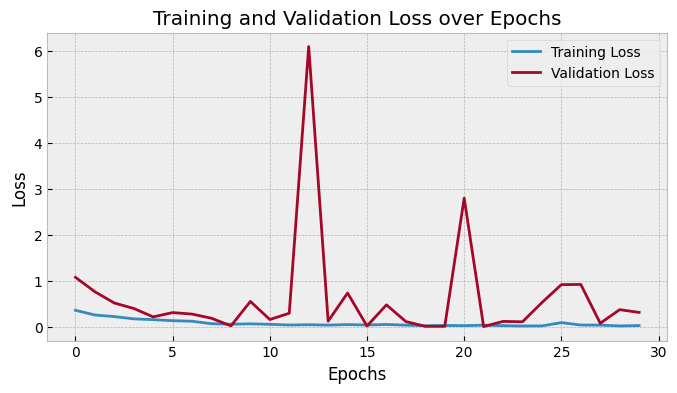

In [71]:
# Plot training and validation loss over epochs
plt.figure(figsize=(8, 4))

# Plot the loss
plt.plot(history2_aug.history['loss'], label='Training Loss')
plt.plot(history2_aug.history['val_loss'], label='Validation Loss')
# Plot labels for axis and titles
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# Add legend
plt.legend()
plt.grid(True)

# Plot the graph
plt.show()

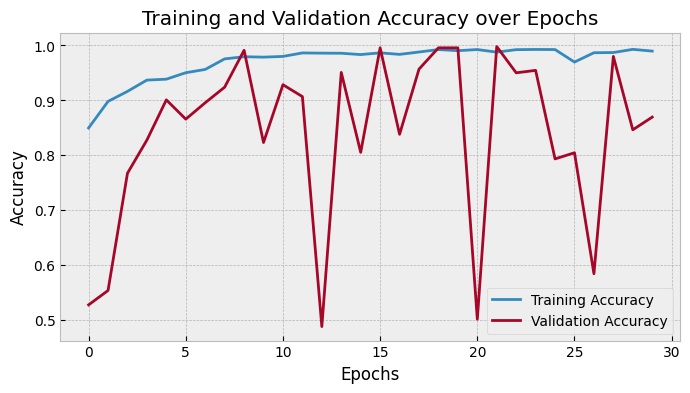

In [72]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 4))

# Plot the accuracy
plt.plot(history2_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history2_aug.history['val_accuracy'], label='Validation Accuracy')
# Plot labels for axis and titles
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# Add legend
plt.legend()
plt.grid(True)
# Plot the graph
plt.show()


In [73]:
# Save the entire model
model2.save('../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/model2_aug.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [74]:
# Load best model performance
best_model2_aug = load_model('../content/drive/MyDrive/Research/Saved_models/Drowsiness_detection/v_2/bestModel_v2_aug.h5')

# Evaluate model performance
best_model2_aug.evaluate(x_test, y_test_encoded)

104/104 [==============================] - 5s 49ms/step - loss: 0.0031 - accuracy: 0.9991


[0.0030924014281481504, 0.9990909099578857]

1/1 [==============================] - 0s 27ms/step


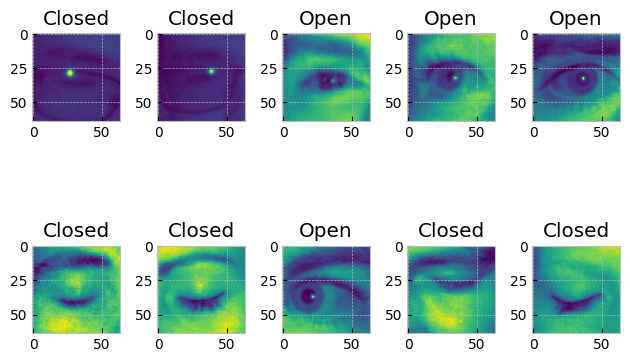

In [79]:
# Show the predictions

# Iterate over the 10 samples in x_test
for idx, i in enumerate(x_test[10:20]):

    # Make prediction
    result = best_model2_aug.predict(np.expand_dims(i,0))

    # Define subplot
    plt.subplot(2, 5, idx+1)

    # Plot the image
    plt.imshow(i)

    # Plot the predicted label
    if result > 0.5:
        plt.title('Open')
    else:
        plt.title('Closed')

    # Define axis
    plt.axis('on')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

104/104 [==============================] - 6s 56ms/step


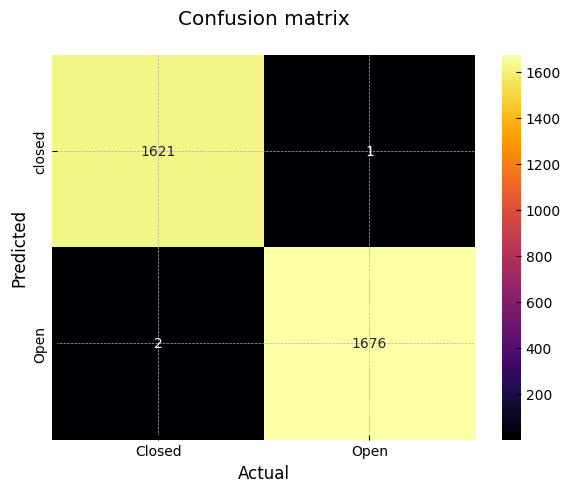

In [76]:
# Make predictions
preds2 = best_model2_aug.predict(x_test)
preds2 = (preds2 >= 0.5).astype(np.int32)

# Define confusion matrix
cm = confusion_matrix(y_test_encoded, preds2)

# Construct confution matrix
plt.figure(figsize=(15, 5))

# Define df for confusion matrix
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])

# Create a subplot
plt.subplot(121)

# Plot the heatmap
sns.heatmap(df_cm, annot=True, fmt="d", cmap='inferno')

# Define axis
plt.axis('on')

# Add titles and labels
plt.title("Confusion matrix\n")
plt.ylabel("Predicted")
plt.xlabel("Actual")

# Show the plt
plt.show()